In [467]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### GATHERING DATA

In [468]:
pelanggan_df = pd.read_excel("dataset/Data Billing (6).xlsx")

In [469]:
pelanggan_df.head()

,Billing Number,Type,Name,Registration Number,Customer Number,Building Ownership Status,Installation Date,Project,Status,Payment Method,...,End Period,Due Date,Confirm Date,Internet Package,Installation Cost,Additional Amount,Admin Fee,Deposit Amount,Additional Item,Final Amount
0,RCV-081124-012853,CUSTOMER,RESSA RAINA,REGVB43151702859,VBTH43151003012052619,OWN,2024-10-12,Sukabumi,UNPAID,NaN,...,2024-12-12,2024-11-11,NaN,LITE link 100Mbps - 30d,0,0,739,0,NaN,99739
1,RCV-081124-012752,CUSTOMER,M.Ilham Fadilah,REGVB43192690618,VBTH43192012022043396,OWN,2024-08-04,Sukabumi,UNPAID,NaN,...,2024-12-12,2024-11-11,NaN,LINK 200 Mbps - 30d,0,0,501,0,NaN,178101
2,RCV-081124-012699,CUSTOMER,LISNAWATI,REGVB43192147735,VBTH43192003011043567,OWN,2024-08-05,Sukabumi,UNPAID,NaN,...,2024-12-12,2024-11-11,NaN,LITE link 100Mbps - 30d,0,0,967,0,NaN,99967
3,RCV-081124-012627,CUSTOMER,Sani Navillah,REGVB43112130057,VBTH43112003008048809,OWN,2024-09-11,Sukabumi,UNPAID,NaN,...,2024-12-12,2024-11-11,NaN,LITE link 100Mbps - 30d,0,0,989,0,NaN,99989
4,RCV-081124-012588,CUSTOMER,HERY HERMANSYAH,REGVB43151717176,VBTH43151022005048743,OWN,2024-09-11,Sukabumi,UNPAID,NaN,...,2024-12-12,2024-11-11,NaN,LITE link 100Mbps - 30d,0,0,975,0,NaN,99975


In [470]:
pelanggan_df.shape

(2573, 21)

In [471]:
pelanggan_df.columns

Index(['Billing Number', 'Type', 'Name', 'Registration Number',
       'Customer Number', 'Building Ownership Status', 'Installation Date',
       'Project', 'Status', 'Payment Method', 'Start Period', 'End Period',
       'Due Date', 'Confirm Date', 'Internet Package', 'Installation Cost',
       'Additional Amount', 'Admin Fee', 'Deposit Amount', 'Additional Item',
       'Final Amount'],
      dtype='object')

### ASSESING DATA

In [472]:
# Ganti spasi dengan garis bawah
pelanggan_df.columns = pelanggan_df.columns.str.replace(' ', '_')

In [473]:
# Menstandarisasi kolom 'Nama' agar huruf besar hanya di awal setiap kata
pelanggan_df['Name'] = pelanggan_df['Name'].str.title()

In [474]:
pelanggan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Billing_Number             2573 non-null   object 
 1   Type                       2573 non-null   object 
 2   Name                       2573 non-null   object 
 3   Registration_Number        2573 non-null   object 
 4   Customer_Number            2541 non-null   object 
 5   Building_Ownership_Status  2573 non-null   object 
 6   Installation_Date          1515 non-null   object 
 7   Project                    2573 non-null   object 
 8   Status                     2573 non-null   object 
 9   Payment_Method             2372 non-null   object 
 10  Start_Period               2541 non-null   object 
 11  End_Period                 2541 non-null   object 
 12  Due_Date                   2573 non-null   object 
 13  Confirm_Date               2372 non-null   objec

In [475]:
pelanggan_df.isna().sum()

Billing_Number                  0
Type                            0
Name                            0
Registration_Number             0
Customer_Number                32
Building_Ownership_Status       0
Installation_Date            1058
Project                         0
Status                          0
Payment_Method                201
Start_Period                   32
End_Period                     32
Due_Date                        0
Confirm_Date                  201
Internet_Package                0
Installation_Cost               0
Additional_Amount               0
Admin_Fee                       0
Deposit_Amount                  0
Additional_Item              2573
Final_Amount                    0
dtype: int64

In [476]:
print("Jumlah duplikasi: ", pelanggan_df.duplicated().sum())

Jumlah duplikasi:  0


### CLEANING DATA

In [477]:
# Instalattion date, Start Period, End Period, Due Date, Confirm Date
datetime_columns = ["Installation_Date", "Start_Period", "End_Period", "Due_Date", "Confirm_Date"]
 
for column in datetime_columns:
  pelanggan_df[column] = pd.to_datetime(pelanggan_df[column])

In [478]:
pelanggan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Billing_Number             2573 non-null   object        
 1   Type                       2573 non-null   object        
 2   Name                       2573 non-null   object        
 3   Registration_Number        2573 non-null   object        
 4   Customer_Number            2541 non-null   object        
 5   Building_Ownership_Status  2573 non-null   object        
 6   Installation_Date          1515 non-null   datetime64[ns]
 7   Project                    2573 non-null   object        
 8   Status                     2573 non-null   object        
 9   Payment_Method             2372 non-null   object        
 10  Start_Period               2541 non-null   datetime64[ns]
 11  End_Period                 2541 non-null   datetime64[ns]
 12  Due_Da

In [479]:
pelanggan_df.isna().sum()

Billing_Number                  0
Type                            0
Name                            0
Registration_Number             0
Customer_Number                32
Building_Ownership_Status       0
Installation_Date            1058
Project                         0
Status                          0
Payment_Method                201
Start_Period                   32
End_Period                     32
Due_Date                        0
Confirm_Date                  201
Internet_Package                0
Installation_Cost               0
Additional_Amount               0
Admin_Fee                       0
Deposit_Amount                  0
Additional_Item              2573
Final_Amount                    0
dtype: int64

In [480]:
pelanggan_df[pelanggan_df.Customer_Number.isna()]

,Billing_Number,Type,Name,Registration_Number,Customer_Number,Building_Ownership_Status,Installation_Date,Project,Status,Payment_Method,...,End_Period,Due_Date,Confirm_Date,Internet_Package,Installation_Cost,Additional_Amount,Admin_Fee,Deposit_Amount,Additional_Item,Final_Amount
68,RCV-051124-008199,REGISTRATION,Eulis Herawati,REGVB43151253163,NaN,OWN,NaT,Sukabumi,PAID,BANK-TRANSFER,...,NaT,2024-11-06,2024-11-05 15:10:00,Promo Free 100Mbps,0,0,0,0,NaN,0
69,RCV-051124-008198,REGISTRATION,Fasum Rw 13 ( Yayan Ismaryana ),REGVB43115493319,NaN,PUBLIC_FACILITIES,NaT,Sukabumi,PAID,BANK-TRANSFER,...,NaT,2024-11-06,2024-11-05 15:00:00,FASUM 20 Mbps 1Y,0,0,0,0,NaN,0
71,RCV-051124-008192,REGISTRATION,Fasum Rw 04 (H. Gundar Kolyubi),REGVB43115851146,NaN,PUBLIC_FACILITIES,NaT,Sukabumi,PAID,BANK-TRANSFER,...,NaT,2024-11-06,2024-11-05 14:50:00,FASUM 20 Mbps 1Y,0,0,0,0,NaN,0
72,RCV-051124-008191,REGISTRATION,Fasum Rw 01 (Kuswandi),REGVB43115196676,NaN,PUBLIC_FACILITIES,NaT,Sukabumi,PAID,BANK-TRANSFER,...,NaT,2024-11-06,2024-11-05 14:50:00,FASUM 20 Mbps 1Y,0,0,0,0,NaN,0
73,RCV-051124-008189,REGISTRATION,Fasum Rw 16 ( Reni Herawati ),REGVB43115908481,NaN,PUBLIC_FACILITIES,NaT,Sukabumi,PAID,BANK-TRANSFER,...,NaT,2024-11-06,2024-11-05 14:50:00,FASUM 20 Mbps 1Y,0,0,0,0,NaN,0
74,RCV-051124-008188,REGISTRATION,Fasum Rw 02 ( A. Rina Riniawati ),REGVB43115877162,NaN,PUBLIC_FACILITIES,NaT,Sukabumi,PAID,BANK-TRANSFER,...,NaT,2024-11-06,2024-11-05 14:40:00,FASUM 20 Mbps 1Y,0,0,0,0,NaN,0
81,RCV-051124-008113,REGISTRATION,Isep Mursyahadatullah,REGVB43151795523,NaN,OWN,NaT,Sukabumi,PAID,BANK-TRANSFER,...,NaT,2024-11-06,2024-11-05 11:50:00,Promo Free 100Mbps,0,0,0,0,NaN,0
84,RCV-051124-008103,REGISTRATION,R. Senator Nurbahagia,REGVB43192398912,NaN,OWN,NaT,Sukabumi,PAID,BANK-TRANSFER,...,NaT,2024-11-06,2024-11-05 11:30:00,Promo Free 100Mbps,0,0,0,0,NaN,0
89,RCV-051124-008092,REGISTRATION,"H Uan Juarnam, Sh.",REGVB43151902394,NaN,OWN,NaT,Sukabumi,PAID,BANK-TRANSFER,...,NaT,2024-11-06,2024-11-05 10:40:00,Promo Free 100Mbps,0,0,0,0,NaN,0
91,RCV-051124-008083,REGISTRATION,Fauziah Rahayu,REGVB43151546745,NaN,OWN,NaT,Sukabumi,PAID,BANK-TRANSFER,...,NaT,2024-11-06,2024-11-05 10:00:00,Promo Free 100Mbps,0,0,0,0,NaN,0


In [481]:
# Fungsi untuk mengisi 'Installation_Date' dengan kondisi if
def fill_installation_date(row):
    if pd.notna(row['Start_Period']):
        return row['Start_Period']
    elif pd.notna(row['Due_Date']):
        return row['Due_Date']
    else:
        return pd.NaT  # Kembali ke NaT jika keduanya kosong

# Terapkan fungsi ke setiap baris
pelanggan_df['Installation_Date'] = pelanggan_df.apply(fill_installation_date, axis=1)

In [482]:
pelanggan_df['Start_Period'] = pelanggan_df['Start_Period'].fillna(pelanggan_df['Due_Date'] - pd.Timedelta(days=1))

# Isi 'End Period' dengan 'Start Period' + 1 bulan
pelanggan_df['End_Period'] = pelanggan_df['Start_Period'] + pd.DateOffset(months=1)

In [483]:
pelanggan_df['Payment_Method'] = pelanggan_df['Payment_Method'].fillna("None")
pelanggan_df['Customer_Number'] = pelanggan_df['Customer_Number'].fillna("None")

In [484]:
pelanggan_df = pelanggan_df.drop("Additional_Item", axis=1)

In [485]:
pelanggan_df.isna().sum()

Billing_Number                 0
Type                           0
Name                           0
Registration_Number            0
Customer_Number                0
Building_Ownership_Status      0
Installation_Date              0
Project                        0
Status                         0
Payment_Method                 0
Start_Period                   0
End_Period                     0
Due_Date                       0
Confirm_Date                 201
Internet_Package               0
Installation_Cost              0
Additional_Amount              0
Admin_Fee                      0
Deposit_Amount                 0
Final_Amount                   0
dtype: int64

### EDA

In [486]:
# menampilkan deskriptif statik
pelanggan_df.describe(include="all")

,Billing_Number,Type,Name,Registration_Number,Customer_Number,Building_Ownership_Status,Installation_Date,Project,Status,Payment_Method,Start_Period,End_Period,Due_Date,Confirm_Date,Internet_Package,Installation_Cost,Additional_Amount,Admin_Fee,Deposit_Amount,Final_Amount
count,2573,2573,2573,2573,2573,2573,2573,2573,2573,2573,2573,2573,2573,2372,2573,2573.0,2573.0,2573.00000,2573.0,2573.000000
unique,2573,2,1043,1058,1027,4,NaN,1,2,5,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN
top,RCV-010824-001248,CUSTOMER,Nendi Sulaeman,REGVB43192668936,None,OWN,NaN,Sukabumi,PAID,BANK-TRANSFER,NaN,NaN,NaN,NaN,LITE link 100Mbps - 30d,NaN,NaN,NaN,NaN,NaN
freq,1,1515,9,6,32,2490,NaN,2573,2372,1085,NaN,NaN,NaN,NaN,1221,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-27 17:16:29.195491584,NaN,NaN,NaN,2024-09-27 16:58:34.652156928,2024-10-28 06:09:22.456276736,2024-09-27 01:32:54.193548544,2024-09-25 16:09:14.494097664,NaN,0.0,0.0,320.72328,0.0,71743.809172
min,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-02 00:00:00,NaN,NaN,NaN,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-08-02 00:00:00,2024-08-01 12:40:00,NaN,0.0,0.0,0.00000,0.0,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-05 00:00:00,NaN,NaN,NaN,2024-09-05 00:00:00,2024-10-05 00:00:00,2024-09-04 00:00:00,2024-09-02 17:26:00,NaN,0.0,0.0,0.00000,0.0,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-01 00:00:00,NaN,NaN,NaN,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-09-30 00:00:00,2024-09-28 16:12:00,NaN,0.0,0.0,241.00000,0.0,99262.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-23 00:00:00,NaN,NaN,NaN,2024-10-23 00:00:00,2024-11-23 00:00:00,2024-10-22 00:00:00,2024-10-20 10:56:15,NaN,0.0,0.0,608.00000,0.0,99739.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-12 00:00:00,NaN,NaN,NaN,2024-11-12 00:00:00,2024-12-12 00:00:00,2024-11-11 00:00:00,2024-11-08 09:40:00,NaN,0.0,0.0,997.00000,0.0,555937.000000


In [487]:
# bikin kolom baru owner untuk memisahkan pelanggan 
pelanggan_df['Owner'] = pelanggan_df["Internet_Package"].apply(lambda x: "Viberlink" if x in ['LITE link 100Mbps - 30d', 'Promo Free 100Mbps '] else "VNET")

In [488]:
result_owner = pelanggan_df.groupby('Owner')['Registration_Number'].nunique()
result_owner

Owner
VNET         153
Viberlink    921
Name: Registration_Number, dtype: int64

In [489]:
# Menghitung jumlah pelaanggan yang berlanagganan berdasarkan jenis paket
result_jenis = pelanggan_df.groupby('Internet_Package')['Registration_Number'].nunique()
result_jenis

Internet_Package
FASUM 20 Mbps 1Y            10
LINK 200 Mbps - 30d         49
LINK 250 Mbps - 30d         69
LINK 300 Mbps - 30d          5
LINK 400 Mbps - 30d          4
LINK 500 Mbps - 30d          1
LITE link 100Mbps - 30d    710
Promo Free 100Mbps         905
[Migrasi] LINK 200          50
[Migrasi] LINK 250          81
[Migrasi] LINK 300           6
[Migrasi] LINK 400           6
[Migrasi] LINK 500           1
Name: Registration_Number, dtype: int64

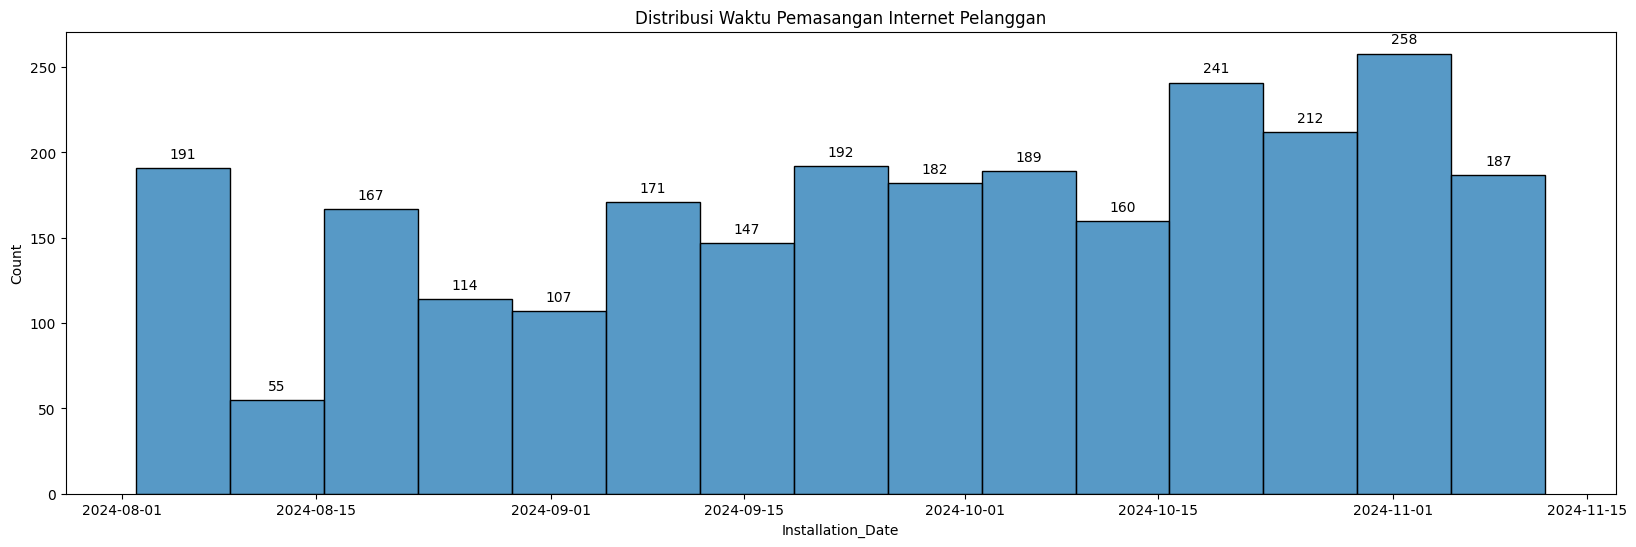

In [490]:
# Plotting
plt.figure(figsize=(20, 6))
ax = sns.histplot(pelanggan_df['Installation_Date'])

# Menambahkan label angka pada setiap batang bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribusi Waktu Pemasangan Internet Pelanggan')
plt.show()

### Paket Mana yang Paling Banyak Diminati oleh Pelanggan (1)

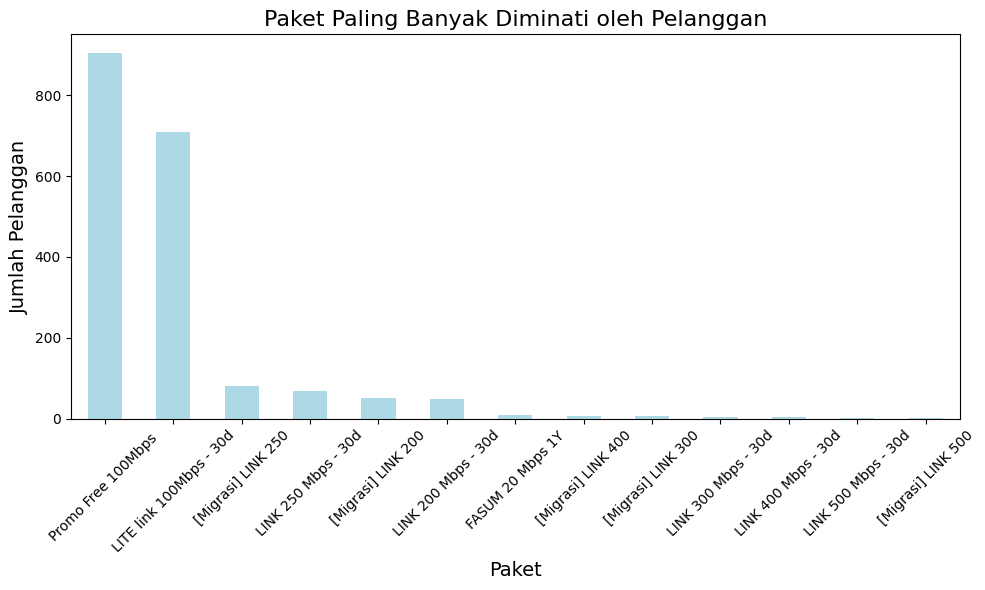

In [491]:
# salah ini untuk agustus - september

# Menghitung jumlah pelanggan per paket
paket_counts = pelanggan_df.groupby('Internet_Package')['Registration_Number'].nunique()

# Visualisasi paket yang paling diminati
plt.figure(figsize=(10, 6))
paket_counts.sort_values(ascending=False).plot(kind='bar', color='lightblue')
plt.title('Paket Paling Banyak Diminati oleh Pelanggan', fontsize=16)
plt.xlabel('Paket', fontsize=14)
plt.ylabel('Jumlah Pelanggan', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [492]:
bypaket_df = pelanggan_df.groupby(by='Internet_Package').Registration_Number.nunique().reset_index()
bypaket_df.rename(columns={
    'Registration_Number': 'customer_count'
}, inplace=True)
bypaket_df

,Internet_Package,customer_count
0,FASUM 20 Mbps 1Y,10
1,LINK 200 Mbps - 30d,49
2,LINK 250 Mbps - 30d,69
3,LINK 300 Mbps - 30d,5
4,LINK 400 Mbps - 30d,4
5,LINK 500 Mbps - 30d,1
6,LITE link 100Mbps - 30d,710
7,Promo Free 100Mbps,905
8,[Migrasi] LINK 200,50
9,[Migrasi] LINK 250,81


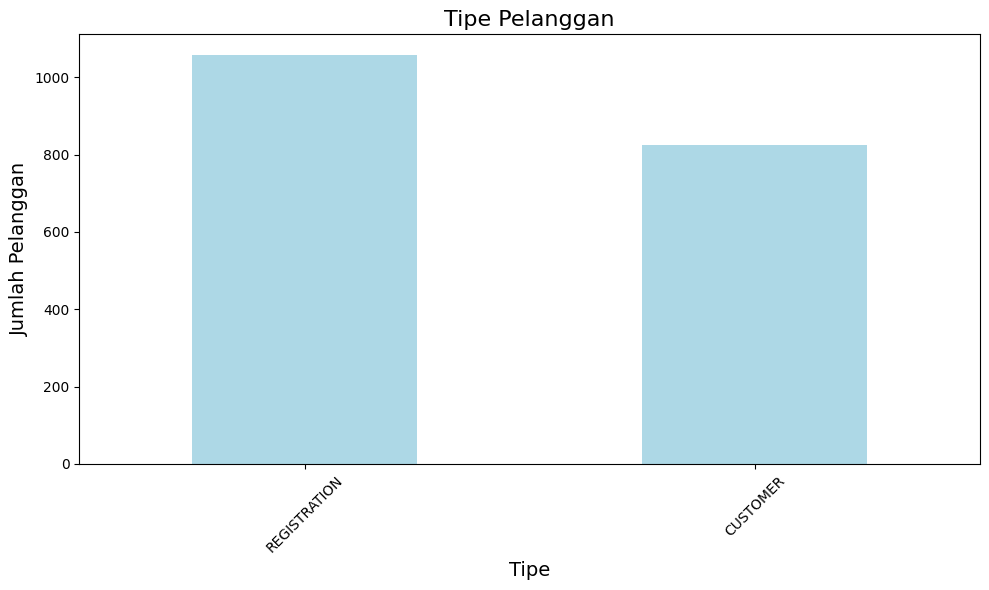

In [493]:
# salah ini untuk agustus - september

# Menghitung jumlah pelanggan per paket
paket_counts = pelanggan_df.groupby('Type')['Registration_Number'].nunique()

# Visualisasi paket yang paling diminati
plt.figure(figsize=(10, 6))
paket_counts.sort_values(ascending=False).plot(kind='bar', color='lightblue')
plt.title('Tipe Pelanggan', fontsize=16)
plt.xlabel('Tipe', fontsize=14)
plt.ylabel('Jumlah Pelanggan', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [494]:
bytype_df = pelanggan_df.groupby(by='Type').Registration_Number.nunique().reset_index()
bytype_df.rename(columns={
    'Registration_Number': 'customer_count'
}, inplace=True)
bytype_df

,Type,customer_count
0,CUSTOMER,825
1,REGISTRATION,1058


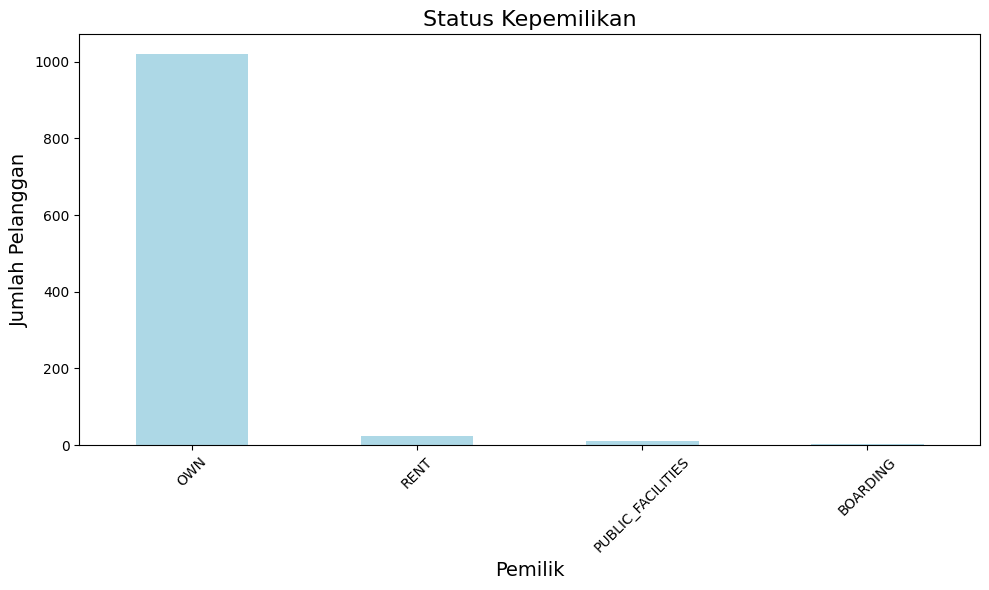

In [495]:
# salah ini untuk agustus - september

# Menghitung jumlah pelanggan per paket
paket_counts = pelanggan_df.groupby('Building_Ownership_Status')['Registration_Number'].nunique()

# Visualisasi paket yang paling diminati
plt.figure(figsize=(10, 6))
paket_counts.sort_values(ascending=False).plot(kind='bar', color='lightblue')
plt.title('Status Kepemilikan', fontsize=16)
plt.xlabel('Pemilik', fontsize=14)
plt.ylabel('Jumlah Pelanggan', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [496]:
byownstatus_df = pelanggan_df.groupby(by='Building_Ownership_Status').Registration_Number.nunique().reset_index()
byownstatus_df.rename(columns={
    'Registration_Number': 'customer_count'
}, inplace=True)
byownstatus_df

,Building_Ownership_Status,customer_count
0,BOARDING,4
1,OWN,1020
2,PUBLIC_FACILITIES,10
3,RENT,24


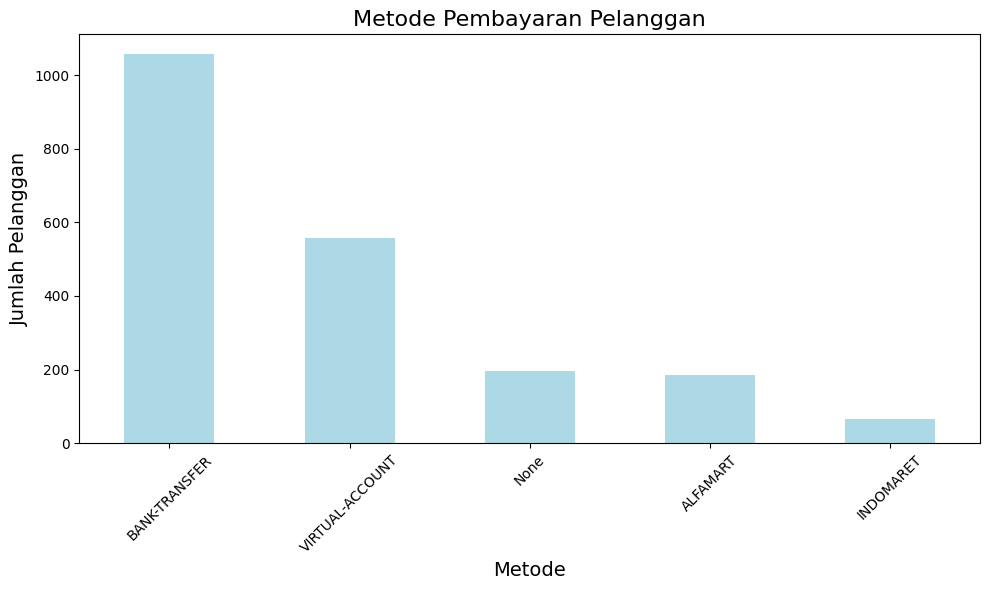

In [497]:
# salah ini untuk agustus - september

# Menghitung jumlah pelanggan per paket
paket_counts = pelanggan_df.groupby('Payment_Method')['Registration_Number'].nunique()

# Visualisasi paket yang paling diminati
plt.figure(figsize=(10, 6))
paket_counts.sort_values(ascending=False).plot(kind='bar', color='lightblue')
plt.title('Metode Pembayaran Pelanggan', fontsize=16)
plt.xlabel('Metode', fontsize=14)
plt.ylabel('Jumlah Pelanggan', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [498]:
bypaymethod_df = pelanggan_df.groupby(by='Payment_Method').Registration_Number.nunique().reset_index()
bypaymethod_df.rename(columns={
    'Registration_Number': 'customer_count'
}, inplace=True)
bypaymethod_df

,Payment_Method,customer_count
0,ALFAMART,186
1,BANK-TRANSFER,1058
2,INDOMARET,66
3,None,196
4,VIRTUAL-ACCOUNT,558


### Revenue berdasarkan paket langganan


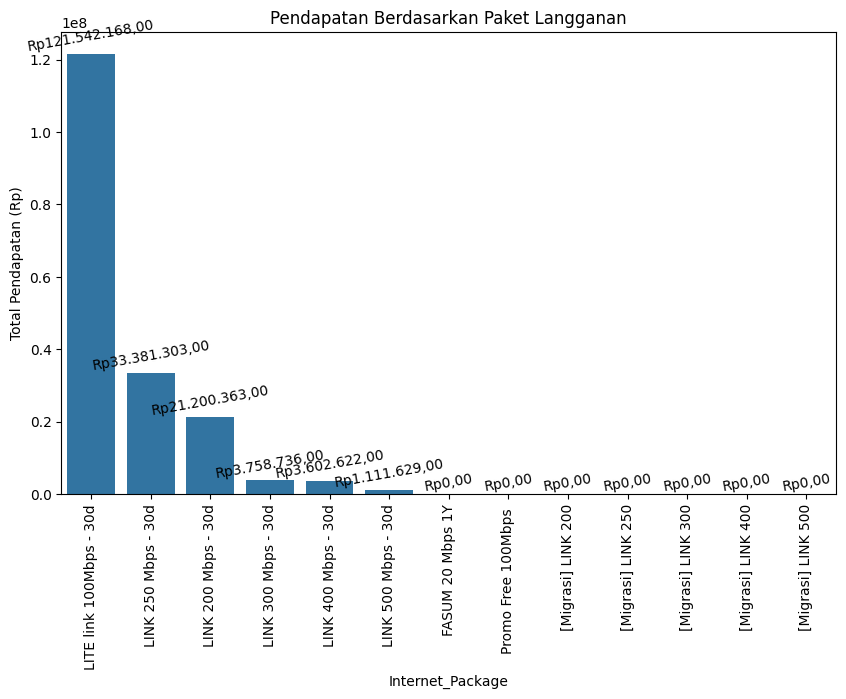

In [499]:
from babel.numbers import format_currency  # Pastikan ini diimpor

# Analisis pendapatan per paket
paket_revenue = pelanggan_df.groupby('Internet_Package')['Final_Amount'].sum().sort_values(ascending=False)


# Format total pendapatan menjadi Rupiah
paket_revenue_rupiah = [format_currency(value, 'IDR', locale='id_ID') for value in paket_revenue.values]

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=paket_revenue.index, y=paket_revenue.values)
plt.xticks(rotation=90)
plt.title("Pendapatan Berdasarkan Paket Langganan")
plt.ylabel("Total Pendapatan (Rp)")

# Menambahkan label pada setiap bar
for index, value in enumerate(paket_revenue_rupiah):
    plt.text(index, paket_revenue.values[index], value, ha='center', va='bottom', rotation=10)

plt.show()


### Bagaimana Performa Penjualan dan Revenue Perusahaan beberapa bulan terakhir ?

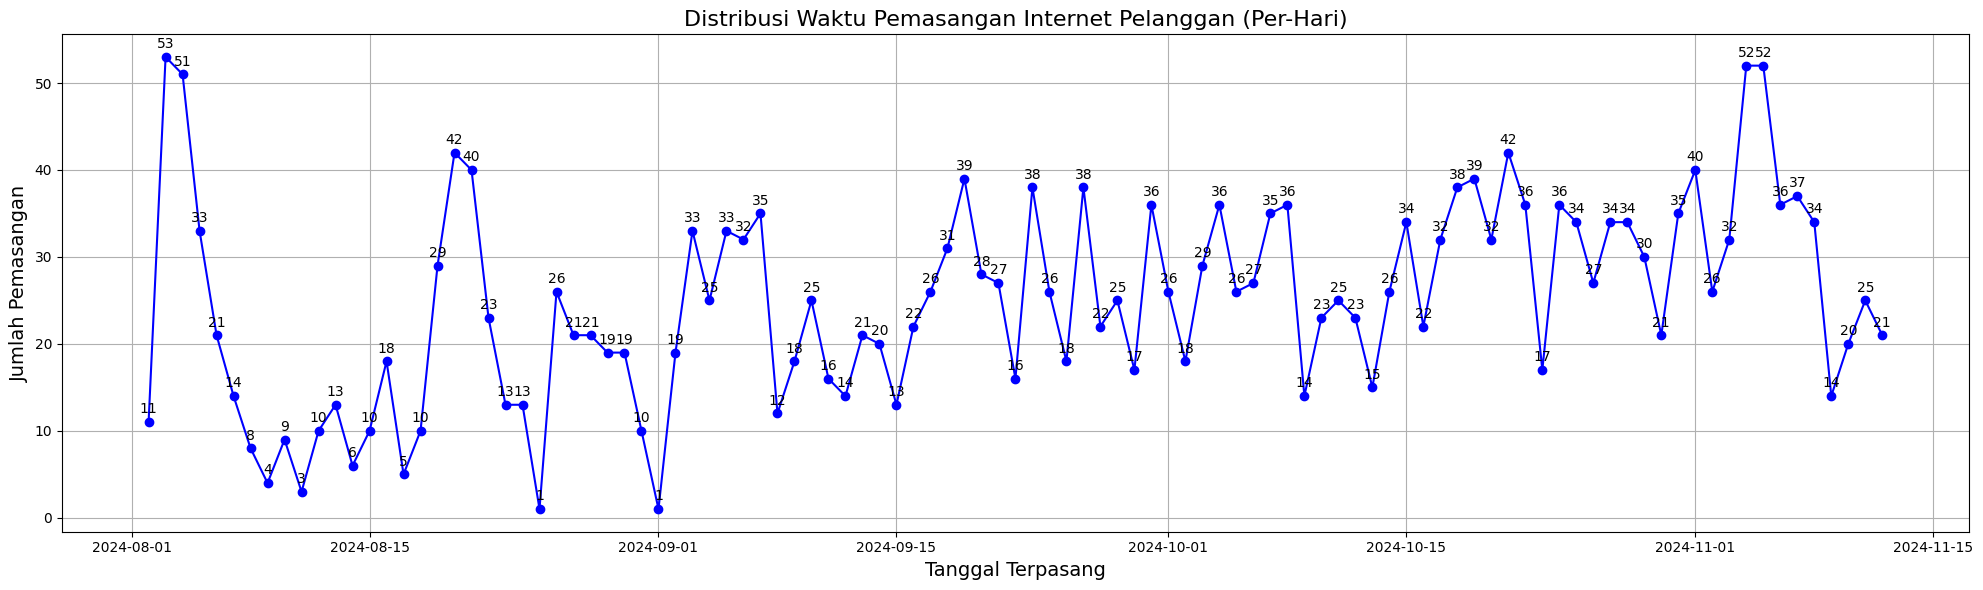

In [500]:
# Mengelompokkan data berdasarkan tanggal dan menghitung jumlah pemasangan
daily_installations = pelanggan_df.groupby(pelanggan_df['Installation_Date'].dt.date).size()

# Membuat line plot untuk distribusi pemasangan per tanggal
plt.figure(figsize=(20, 6))
plt.plot(daily_installations.index, daily_installations.values, color='blue', marker='o')

# Menambahkan label angka pada setiap titik
for i, value in enumerate(daily_installations.values):
    plt.text(daily_installations.index[i], value + 1, str(value), ha='center', fontsize=10, color='black')

# Memberikan judul dan label pada grafik
plt.title('Distribusi Waktu Pemasangan Internet Pelanggan (Per-Hari)', fontsize=16)
plt.xlabel('Tanggal Terpasang', fontsize=14)
plt.ylabel('Jumlah Pemasangan', fontsize=14)

# Menampilkan grid dan plot
plt.grid(True)
plt.tight_layout()
plt.show()

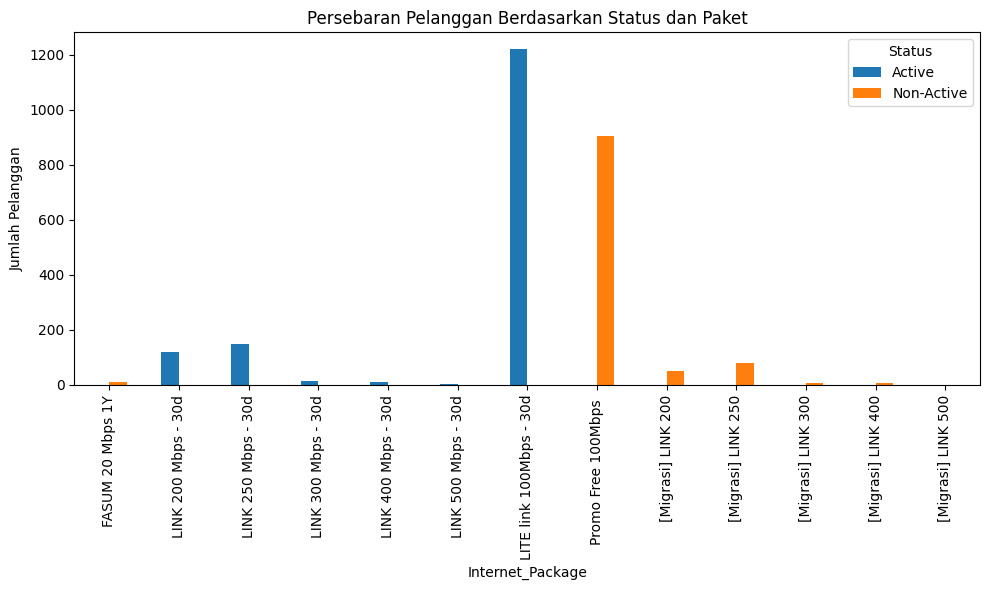

In [516]:
import matplotlib.pyplot as plt

pivot_table = pelanggan_df.pivot_table(index='Internet_Package', columns='Status_Customer', aggfunc='size', fill_value=0)

# Bar chart untuk visualisasi pivot table
pivot_table.plot(kind='bar', figsize=(10, 6))

plt.title('Persebaran Pelanggan Berdasarkan Status dan Paket')
plt.ylabel('Paket')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=90)  # Memutar label pada sumbu X agar lebih mudah dibaca
plt.legend(title='Status')
plt.tight_layout()  # Agar tampilan tidak terpotong
plt.show()


### RFM

In [501]:
rfm_df = pelanggan_df.groupby(by='Registration_Number', as_index=False).agg({
    'Installation_Date': 'max',
    'Name': 'nunique',
    'Final_Amount': 'sum'
})
rfm_df.columns = ['Registration_Number', 'max_order_timestamp', 'frequency', 'monetary']

rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = pelanggan_df['Installation_Date'].dt.date.max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.drop('max_order_timestamp', axis=1, inplace=True)
rfm_df.head()

,Registration_Number,frequency,monetary,recency
0,REGVB43112130057,1,199528,0
1,REGVB43112336868,1,199188,18
2,REGVB43113125620,1,99337,10
3,REGVB43113136097,1,99150,16
4,REGVB43113137331,1,0,8


C:\Users\faisa\AppData\Local\Temp\ipykernel_32156\2695139072.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\faisa\AppData\Local\Temp\ipykernel_32156\2695139072.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\faisa\AppData\Local\Temp\ipykernel_32156\2695139072.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


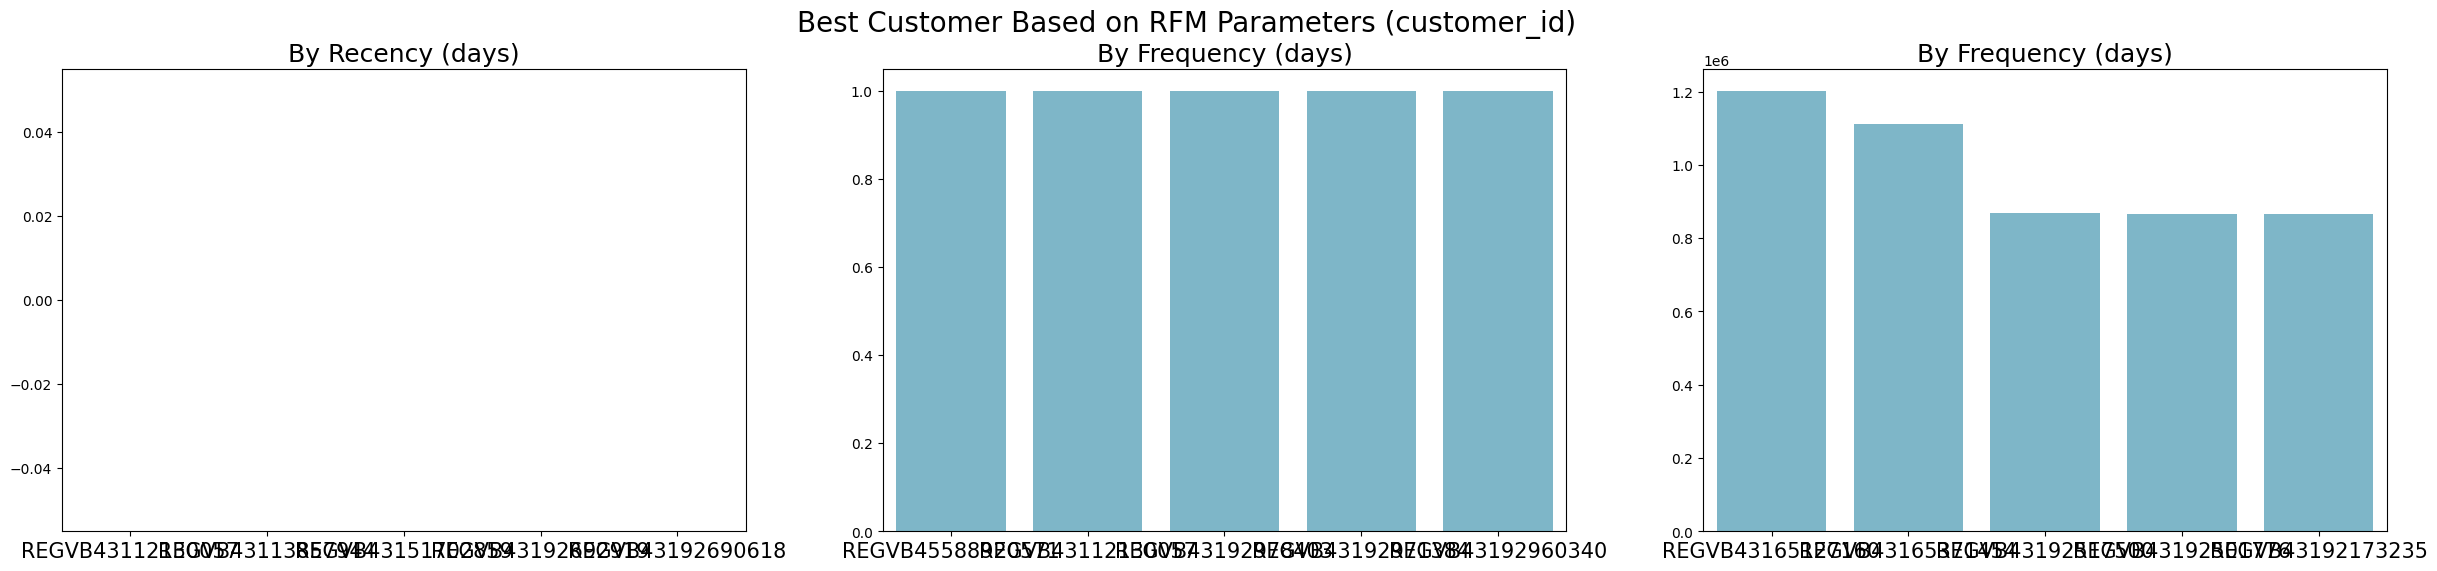

In [502]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(
    y='recency',
    x='Registration_Number',
    data=rfm_df.sort_values(by='recency', ascending=True).head(5),
    palette= colors,
    ax=ax[0]
)

ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('By Recency (days)', loc='center', fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(
    y='frequency',
    x='Registration_Number',
    data=rfm_df.sort_values(by='frequency', ascending=False).head(5),
    palette= colors,
    ax=ax[1]
)

ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('By Frequency (days)', loc='center', fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(
    y='monetary',
    x='Registration_Number',
    data=rfm_df.sort_values(by='monetary', ascending=False).head(5),
    palette= colors,
    ax=ax[2]
)

ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('By Frequency (days)', loc='center', fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [503]:
pelanggan_df.describe(include="all")


,Billing_Number,Type,Name,Registration_Number,Customer_Number,Building_Ownership_Status,Installation_Date,Project,Status,Payment_Method,...,End_Period,Due_Date,Confirm_Date,Internet_Package,Installation_Cost,Additional_Amount,Admin_Fee,Deposit_Amount,Final_Amount,Owner
count,2573,2573,2573,2573,2573,2573,2573,2573,2573,2573,...,2573,2573,2372,2573,2573.0,2573.0,2573.00000,2573.0,2573.000000,2573
unique,2573,2,1043,1058,1027,4,NaN,1,2,5,...,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,2
top,RCV-010824-001248,CUSTOMER,Nendi Sulaeman,REGVB43192668936,None,OWN,NaN,Sukabumi,PAID,BANK-TRANSFER,...,NaN,NaN,NaN,LITE link 100Mbps - 30d,NaN,NaN,NaN,NaN,NaN,Viberlink
freq,1,1515,9,6,32,2490,NaN,2573,2372,1085,...,NaN,NaN,NaN,1221,NaN,NaN,NaN,NaN,NaN,2126
mean,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-27 17:16:29.195491584,NaN,NaN,NaN,...,2024-10-28 06:09:22.456276736,2024-09-27 01:32:54.193548544,2024-09-25 16:09:14.494097664,NaN,0.0,0.0,320.72328,0.0,71743.809172,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-02 00:00:00,NaN,NaN,NaN,...,2024-09-01 00:00:00,2024-08-02 00:00:00,2024-08-01 12:40:00,NaN,0.0,0.0,0.00000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2024-09-05 00:00:00,NaN,NaN,NaN,...,2024-10-05 00:00:00,2024-09-04 00:00:00,2024-09-02 17:26:00,NaN,0.0,0.0,0.00000,0.0,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-01 00:00:00,NaN,NaN,NaN,...,2024-11-01 00:00:00,2024-09-30 00:00:00,2024-09-28 16:12:00,NaN,0.0,0.0,241.00000,0.0,99262.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-23 00:00:00,NaN,NaN,NaN,...,2024-11-23 00:00:00,2024-10-22 00:00:00,2024-10-20 10:56:15,NaN,0.0,0.0,608.00000,0.0,99739.000000,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-12 00:00:00,NaN,NaN,NaN,...,2024-12-12 00:00:00,2024-11-11 00:00:00,2024-11-08 09:40:00,NaN,0.0,0.0,997.00000,0.0,555937.000000,NaN


In [504]:
# Fungsi untuk menentukan status
def determine_status(row):
    if row['Type'] == 'CUSTOMER':
        return 'Active'
    else:
        return 'Non-Active'

# Terapkan fungsi ke setiap baris
pelanggan_df['Status_Customer'] = pelanggan_df.apply(determine_status, axis=1)

In [505]:
pelanggan_df.head()

,Billing_Number,Type,Name,Registration_Number,Customer_Number,Building_Ownership_Status,Installation_Date,Project,Status,Payment_Method,...,Due_Date,Confirm_Date,Internet_Package,Installation_Cost,Additional_Amount,Admin_Fee,Deposit_Amount,Final_Amount,Owner,Status_Customer
0,RCV-081124-012853,CUSTOMER,Ressa Raina,REGVB43151702859,VBTH43151003012052619,OWN,2024-11-12,Sukabumi,UNPAID,None,...,2024-11-11,NaT,LITE link 100Mbps - 30d,0,0,739,0,99739,Viberlink,Active
1,RCV-081124-012752,CUSTOMER,M.Ilham Fadilah,REGVB43192690618,VBTH43192012022043396,OWN,2024-11-12,Sukabumi,UNPAID,None,...,2024-11-11,NaT,LINK 200 Mbps - 30d,0,0,501,0,178101,VNET,Active
2,RCV-081124-012699,CUSTOMER,Lisnawati,REGVB43192147735,VBTH43192003011043567,OWN,2024-11-12,Sukabumi,UNPAID,None,...,2024-11-11,NaT,LITE link 100Mbps - 30d,0,0,967,0,99967,Viberlink,Active
3,RCV-081124-012627,CUSTOMER,Sani Navillah,REGVB43112130057,VBTH43112003008048809,OWN,2024-11-12,Sukabumi,UNPAID,None,...,2024-11-11,NaT,LITE link 100Mbps - 30d,0,0,989,0,99989,Viberlink,Active
4,RCV-081124-012588,CUSTOMER,Hery Hermansyah,REGVB43151717176,VBTH43151022005048743,OWN,2024-11-12,Sukabumi,UNPAID,None,...,2024-11-11,NaT,LITE link 100Mbps - 30d,0,0,975,0,99975,Viberlink,Active


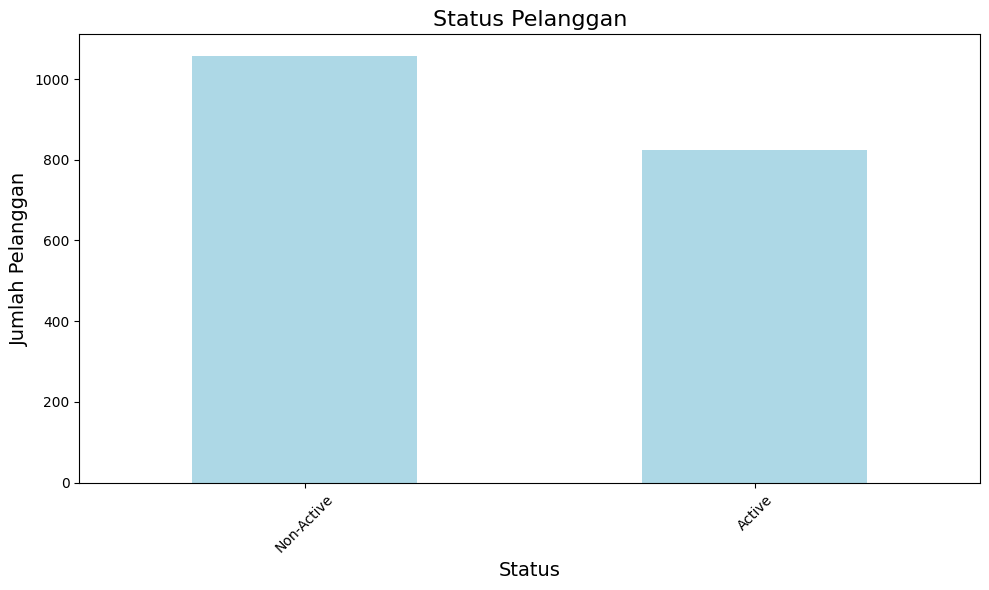

In [506]:
# salah ini untuk agustus - september

# Menghitung jumlah pelanggan per paket
paket_counts = pelanggan_df.groupby('Status_Customer')['Registration_Number'].nunique()

# Visualisasi paket yang paling diminati
plt.figure(figsize=(10, 6))
paket_counts.sort_values(ascending=False).plot(kind='bar', color='lightblue')
plt.title('Status Pelanggan', fontsize=16)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Jumlah Pelanggan', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [507]:
bystatcustomer_df = pelanggan_df.groupby(by='Status_Customer').Registration_Number.nunique().reset_index()
bystatcustomer_df.rename(columns={
    'Registration_Number': 'customer_count'
}, inplace=True)
bystatcustomer_df

,Status_Customer,customer_count
0,Active,825
1,Non-Active,1058


In [508]:
pelanggan_df.head()

,Billing_Number,Type,Name,Registration_Number,Customer_Number,Building_Ownership_Status,Installation_Date,Project,Status,Payment_Method,...,Due_Date,Confirm_Date,Internet_Package,Installation_Cost,Additional_Amount,Admin_Fee,Deposit_Amount,Final_Amount,Owner,Status_Customer
0,RCV-081124-012853,CUSTOMER,Ressa Raina,REGVB43151702859,VBTH43151003012052619,OWN,2024-11-12,Sukabumi,UNPAID,None,...,2024-11-11,NaT,LITE link 100Mbps - 30d,0,0,739,0,99739,Viberlink,Active
1,RCV-081124-012752,CUSTOMER,M.Ilham Fadilah,REGVB43192690618,VBTH43192012022043396,OWN,2024-11-12,Sukabumi,UNPAID,None,...,2024-11-11,NaT,LINK 200 Mbps - 30d,0,0,501,0,178101,VNET,Active
2,RCV-081124-012699,CUSTOMER,Lisnawati,REGVB43192147735,VBTH43192003011043567,OWN,2024-11-12,Sukabumi,UNPAID,None,...,2024-11-11,NaT,LITE link 100Mbps - 30d,0,0,967,0,99967,Viberlink,Active
3,RCV-081124-012627,CUSTOMER,Sani Navillah,REGVB43112130057,VBTH43112003008048809,OWN,2024-11-12,Sukabumi,UNPAID,None,...,2024-11-11,NaT,LITE link 100Mbps - 30d,0,0,989,0,99989,Viberlink,Active
4,RCV-081124-012588,CUSTOMER,Hery Hermansyah,REGVB43151717176,VBTH43151022005048743,OWN,2024-11-12,Sukabumi,UNPAID,None,...,2024-11-11,NaT,LITE link 100Mbps - 30d,0,0,975,0,99975,Viberlink,Active
